<a href="https://colab.research.google.com/github/lucguittard/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Luc_Guittard_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [2]:
import pandas as pd
df1 = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
#for future ref., copy webaddress of page that opens upon clicking the actual .csv file link
df1.head(20) 


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [0]:
!pip install pandas==0.23.4

In [12]:
# I expect exercise_time is a prime determinant of weight, with age being a potential confounding variable (what doesn't it affect?)
cross_tab1 = pd.crosstab(df1['exercise_time'],df1['weight']) #want to use bins -> crosstabs is usefull particularly for *categorical* data

#print(cross_tab1) #crosstab works, try to make variables more categorical 
df1.dtypes

#df2 = df1

exercise_time_bins = pd.cut(df1['exercise_time'],10) #half-hour incrementation seems reasonable
weight_bins = pd.cut(df1['weight'],6) #seem like good weight categories, approx. 24lb range for each cat.

pd.crosstab(exercise_time_bins,weight_bins) #try downgrading pandas first -> Hey! working



weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
exercise_time,,,,,,
"(-0.3, 30.0]",21,22,21,29,33,23
"(30.0, 60.0]",22,20,22,23,30,12
"(60.0, 90.0]",27,35,40,28,30,4
"(90.0, 120.0]",26,19,41,32,34,0
"(120.0, 150.0]",31,15,25,21,13,0
"(150.0, 180.0]",28,41,26,21,2,0
"(180.0, 210.0]",29,30,22,13,0,0
"(210.0, 240.0]",32,36,29,1,0,0
"(240.0, 270.0]",33,46,21,0,0,0


In [14]:
#What's the takeaway thusfar? 
#Well, there is a clear decline in the amount of individuals committed to (lengthy) exercise 
# as one goes from the the second weight cat. (124.33-148.667) to higher weight categories. 

# Looking at the potential confounding variable of age... 

age_bins = pd.cut(df1['age'],10)
pd.crosstab(exercise_time_bins,age_bins) #Both age and weight appear to impact commitment to more lengthy exercise times. 
                                         # Notably, moderate exercise (from 0 to 120 minutes) appears to grow in popularity with age


age,"(17.938, 24.2]","(24.2, 30.4]","(30.4, 36.6]","(36.6, 42.8]","(42.8, 49.0]","(49.0, 55.2]","(55.2, 61.4]","(61.4, 67.6]","(67.6, 73.8]","(73.8, 80.0]"
exercise_time,,,,,,,,,,
"(-0.3, 30.0]",10,11,14,10,11,10,12,19,21,31
"(30.0, 60.0]",12,19,16,12,11,9,4,11,17,18
"(60.0, 90.0]",17,7,7,15,14,9,20,18,23,34
"(90.0, 120.0]",15,7,16,17,10,9,14,19,25,20
"(120.0, 150.0]",15,8,11,5,8,12,8,9,17,12
"(150.0, 180.0]",19,12,11,15,10,9,14,9,19,0
"(180.0, 210.0]",14,13,16,6,10,7,12,8,8,0
"(210.0, 240.0]",18,16,12,13,8,9,9,12,1,0
"(240.0, 270.0]",8,18,13,16,21,12,8,4,0,0


In [29]:
#What about proportional representation
ct1 = pd.crosstab(exercise_time_bins,age_bins, normalize = 'columns')
ct2 = pd.crosstab(exercise_time_bins,weight_bins, normalize = 'columns')
print(ct2)

weight          (99.854, 124.333]        ...         (221.667, 246.0]
exercise_time                            ...                         
(-0.3, 30.0]             0.071429        ...                 0.589744
(30.0, 60.0]             0.074830        ...                 0.307692
(60.0, 90.0]             0.091837        ...                 0.102564
(90.0, 120.0]            0.088435        ...                 0.000000
(120.0, 150.0]           0.105442        ...                 0.000000
(150.0, 180.0]           0.095238        ...                 0.000000
(180.0, 210.0]           0.098639        ...                 0.000000
(210.0, 240.0]           0.108844        ...                 0.000000
(240.0, 270.0]           0.112245        ...                 0.000000
(270.0, 300.0]           0.153061        ...                 0.000000

[10 rows x 6 columns]


In [24]:
pd.crosstab(age_bins,weight_bins,normalize = 'index') #Why not...
#Clear here that the sample is biased towards those in lower weight categories with little apparent bias towards specific age groups


weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(17.938, 24.2]",0.259259,0.229630,0.266667,0.140741,0.081481,0.022222
"(24.2, 30.4]",0.289256,0.305785,0.198347,0.090909,0.099174,0.016529
"(30.4, 36.6]",0.300000,0.223077,0.215385,0.115385,0.115385,0.030769
"(36.6, 42.8]",0.349593,0.268293,0.146341,0.121951,0.105691,0.008130
"(42.8, 49.0]",0.196581,0.341880,0.213675,0.111111,0.102564,0.034188
"(49.0, 55.2]",0.311321,0.273585,0.160377,0.150943,0.094340,0.009434
"(55.2, 61.4]",0.212389,0.274336,0.203540,0.159292,0.150442,0.000000
"(61.4, 67.6]",0.128440,0.275229,0.220183,0.146789,0.155963,0.073394
"(67.6, 73.8]",0.213740,0.152672,0.274809,0.167939,0.129771,0.061069


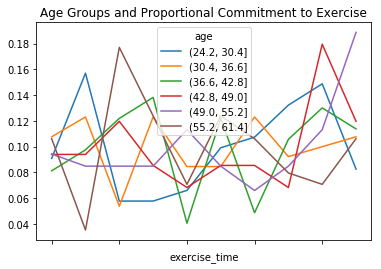

In [46]:
#plotting the variables
ct3 = ct1.iloc[:,[1,2,3,4,5,6]]
ct3.plot(title='Age Groups and Proportional Commitment to Exercise') #messy; take a page from classmates and leave one or both variables continuous




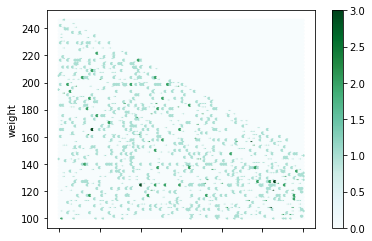

In [43]:
x = list(df1['exercise_time'])
y = list(df1['weight'])
#print (x)
df1.plot.hexbin()
df1.plot.hexbin(x = 'exercise_time',y = 'weight')

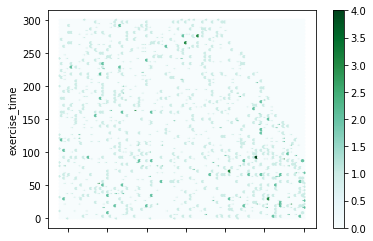

In [45]:
df1.plot.hexbin(x = 'age',y = 'exercise_time')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data? continuous, but rendered categorical for practical  examination via crosstabulation
2.  What are the relationships between the variables? 
There appears to be a general negative correlation between the amount of time committed to exercise and weight, and a negative correlation also between age and time committment to exercise. 
3.  Which relationships are "real", and which spurious? The weight-exercise time appears to be a real relationship. From the above analysis, no spurious relationships stand out though there may be a Sampson's paradox in effect for the age-exercise relationship, with a positive correlation occuring for low to moderate levels of exercise, and a negative correlation occuring for the broader trend. 


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)